# Sentiment analysis

The aim is to analyze the emotion of the text.

To put it briely, the process of detecting a positive or negative emotion of a text.

Using sentiment analysis we can detect whether the given sentence, paragraph or a document contains a positive or negative emotion/opinion in it.

A tool to know airport customers in-depth.

To know what kind of emotion/sentiment do customers have for airport service quality.

The objective is to improve airport products/services based on the analysis of customer sentiments.

## Importing libraries

In [1]:
# Import library

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Marko\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
# Import library

import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Import library

import numpy as np 
import nltk
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  

## Reading dataset

In [7]:
data = pd.read_csv('newdata2.csv')
data.head(10)

,Unnamed: 0,Unnamed: 0.1,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Location,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names,tokens,no_tokens
0,0,15421,4/7/2017 7:52,update flt departed back dublin but flt offloa...,20959.0,240.0,0.0,0.0,"Belfast, Northern Ireland",@dublinairport,DUB,Dublin Airport,"['update', 'flt', 'departed', 'back', 'dublin'...","['update', 'flt', 'departed', 'back', 'dublin'..."
1,1,25645,12/3/2018 14:06,lads come rally the troops for your pals they ...,1433.0,637.0,0.0,0.0,"Dublin, Ireland",@dublinairport,DUB,Dublin Airport,"['lads', 'come', 'rally', 'troops', 'pals', 'a...","['lads', 'come', 'rally', 'troops', 'pals', 'a..."
2,2,88734,12/24/2020 19:34:34,NaN,27616.0,868.0,0.0,0.0,"Halifax, NS",@dublinairport,DUB,Dublin Airport,[],[]
3,3,181260,6/12/2020 0:33:26,june british airways resumed daily service fro...,51130.0,3181.0,0.0,0.0,San Francisco Int'l Airport,@heathrowairport,LHR,Heathrow Airport,"['june', 'british', 'airways', 'resumed', 'dai...","['june', 'british', 'airways', 'resumed', 'dai..."
4,4,262833,8/29/2020 0:36:32,NaN,27451.0,452.0,0.0,2.0,"Washington, DC",@heathrowairport,LHR,Heathrow Airport,[],[]
5,5,274014,11/7/2016 6:42:56,amazing trip now way home with thx jfk for the...,90.0,318.0,0.0,0.0,NaN,@heathrowairport,LHR,Heathrow Airport,"['amazing', 'trip', 'way', 'home', 'thx', 'jfk...","['amazing', 'trip', 'way', 'home', 'thx', 'jfk..."
6,6,274016,11/7/2016 7:01:51,from brazil get hours there and have nice flig...,1610.0,329.0,0.0,0.0,"Rio de Janeiro, Brasil",@heathrowairport,LHR,Heathrow Airport,"['brazil', 'get', 'hours', 'nice', 'flight', '...","['brazil', 'get', 'hours', 'nice', 'flight', '..."
7,7,274022,11/7/2016 11:16:36,fast track yeah right slow,93.0,219.0,0.0,0.0,Ireland,@dublinairport,DUB,Dublin Airport,"['fast', 'track', 'yeah', 'right', 'slow']","['fast', 'track', 'yeah', 'right', 'slow']"
8,8,274023,11/7/2016 12:23:15,what with drop off lanes terminal the queue re...,358.0,379.0,0.0,0.0,London - Strüer - OnAir,@heathrowairport,LHR,Heathrow Airport,"['drop', 'lanes', 'terminal', 'queue', 'reache...","['drop', 'lanes', 'terminal', 'queue', 'reache..."
9,9,274024,11/7/2016 12:26:07,landan,195.0,1118.0,0.0,0.0,NaN,@gatwick_airport,LGW,Gatwick Airport LGW,['landan'],['landan']


## Checking data and null values

In [9]:
# Checking data

# 273 188 rows

# 14 columns

data.shape

(273188, 14)

In [10]:
# checking null values

data.isnull().any().any()

True

In [11]:
# checking null values

data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273188 entries, 0 to 273187
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           273188 non-null  int64  
 1   Unnamed: 0.1         273188 non-null  int64  
 2   Date                 273188 non-null  object 
 3   Tweet Text           240804 non-null  object 
 4   Followers            273188 non-null  float64
 5   Follows              273188 non-null  float64
 6   Retweets             273188 non-null  float64
 7   Favorites            273188 non-null  float64
 8   Location             193358 non-null  object 
 9   Airport_Twitter_Tag  273188 non-null  object 
 10  Airport_IATA_Codes   273188 non-null  object 
 11  Airport_Names        273188 non-null  object 
 12  tokens               273188 non-null  object 
 13  no_tokens            273188 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 29.2+ MB


<ipython-input-11-26593ddadbbc>:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(null_counts=True)


In [12]:
# checking null values

data_new = data[data['Tweet Text'].notnull()]

In [13]:
# checking null values

data_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240804 entries, 0 to 273187
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           240804 non-null  int64  
 1   Unnamed: 0.1         240804 non-null  int64  
 2   Date                 240804 non-null  object 
 3   Tweet Text           240804 non-null  object 
 4   Followers            240804 non-null  float64
 5   Follows              240804 non-null  float64
 6   Retweets             240804 non-null  float64
 7   Favorites            240804 non-null  float64
 8   Location             170230 non-null  object 
 9   Airport_Twitter_Tag  240804 non-null  object 
 10  Airport_IATA_Codes   240804 non-null  object 
 11  Airport_Names        240804 non-null  object 
 12  tokens               240804 non-null  object 
 13  no_tokens            240804 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 27.6+ MB


<ipython-input-13-6fc42301145a>:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  data_new.info(null_counts=True)


In [14]:
# checking null values

data_new.isnull().any().any()

True

# Calculating score and labeling the data

In [16]:
# calculating compound score and labeling vader score

data_new['vader_score'] = data_new['Tweet Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

<ipython-input-16-d051e618e245>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['vader_score'] = data_new['Tweet Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [17]:
# checking data and vader score column

data_new.head(15)

,Unnamed: 0,Unnamed: 0.1,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Location,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names,tokens,no_tokens,vader_score
0,0,15421,4/7/2017 7:52,update flt departed back dublin but flt offloa...,20959.0,240.0,0.0,0.0,"Belfast, Northern Ireland",@dublinairport,DUB,Dublin Airport,"['update', 'flt', 'departed', 'back', 'dublin'...","['update', 'flt', 'departed', 'back', 'dublin'...",0.0000
1,1,25645,12/3/2018 14:06,lads come rally the troops for your pals they ...,1433.0,637.0,0.0,0.0,"Dublin, Ireland",@dublinairport,DUB,Dublin Airport,"['lads', 'come', 'rally', 'troops', 'pals', 'a...","['lads', 'come', 'rally', 'troops', 'pals', 'a...",0.0000
3,3,181260,6/12/2020 0:33:26,june british airways resumed daily service fro...,51130.0,3181.0,0.0,0.0,San Francisco Int'l Airport,@heathrowairport,LHR,Heathrow Airport,"['june', 'british', 'airways', 'resumed', 'dai...","['june', 'british', 'airways', 'resumed', 'dai...",0.0000
5,5,274014,11/7/2016 6:42:56,amazing trip now way home with thx jfk for the...,90.0,318.0,0.0,0.0,NaN,@heathrowairport,LHR,Heathrow Airport,"['amazing', 'trip', 'way', 'home', 'thx', 'jfk...","['amazing', 'trip', 'way', 'home', 'thx', 'jfk...",0.8860
6,6,274016,11/7/2016 7:01:51,from brazil get hours there and have nice flig...,1610.0,329.0,0.0,0.0,"Rio de Janeiro, Brasil",@heathrowairport,LHR,Heathrow Airport,"['brazil', 'get', 'hours', 'nice', 'flight', '...","['brazil', 'get', 'hours', 'nice', 'flight', '...",-0.0258
7,7,274022,11/7/2016 11:16:36,fast track yeah right slow,93.0,219.0,0.0,0.0,Ireland,@dublinairport,DUB,Dublin Airport,"['fast', 'track', 'yeah', 'right', 'slow']","['fast', 'track', 'yeah', 'right', 'slow']",0.2960
8,8,274023,11/7/2016 12:23:15,what with drop off lanes terminal the queue re...,358.0,379.0,0.0,0.0,London - Strüer - OnAir,@heathrowairport,LHR,Heathrow Airport,"['drop', 'lanes', 'terminal', 'queue', 'reache...","['drop', 'lanes', 'terminal', 'queue', 'reache...",-0.2263
9,9,274024,11/7/2016 12:26:07,landan,195.0,1118.0,0.0,0.0,NaN,@gatwick_airport,LGW,Gatwick Airport LGW,['landan'],['landan'],0.0000
10,10,274027,11/7/2016 12:48:59,beautiful copenhagen,48.0,199.0,0.0,0.0,"Isle of Wight, United Kingdom",@gatwick_airport,LGW,Gatwick Airport LGW,"['beautiful', 'copenhagen']","['beautiful', 'copenhagen']",0.5994
11,11,274028,11/7/2016 12:59:00,you need sort out your doors arrivals the nort...,134.0,792.0,0.0,0.0,west sussex,@gatwick_airport,LGW,Gatwick Airport LGW,"['need', 'sort', 'doors', 'arrivals', 'north',...","['need', 'sort', 'doors', 'arrivals', 'north',...",0.0762


In [18]:
# checking positive and negative

positive_num = len(data_new[data_new['vader_score'] >=0.05])

negative_num = len(data_new[data_new['vader_score']<0.05])

In [19]:
# checking positive and negative

#positive_num,neutral_num, negative_num
positive_num, negative_num

(107164, 133640)

In [20]:
# adding vader sentiment label column

data_new['vader_sentiment_label']= data_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))

<ipython-input-20-64f8b8163ea5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['vader_sentiment_label']= data_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))


In [21]:
# adding vader sentiment label column

#data_new.loc[df_new['vaderReviewScore'] >=0.00,"vaderSentimentLabel"] = 1
#data_new.loc[df_new['vaderReviewScore']<=-0.00,"vaderSentimentLabel"] = 0

# checking vader sentiment label column

data_new.head()

,Unnamed: 0,Unnamed: 0.1,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Location,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names,tokens,no_tokens,vader_score,vader_sentiment_label
0,0,15421,4/7/2017 7:52,update flt departed back dublin but flt offloa...,20959.0,240.0,0.0,0.0,"Belfast, Northern Ireland",@dublinairport,DUB,Dublin Airport,"['update', 'flt', 'departed', 'back', 'dublin'...","['update', 'flt', 'departed', 'back', 'dublin'...",0.0000,0
1,1,25645,12/3/2018 14:06,lads come rally the troops for your pals they ...,1433.0,637.0,0.0,0.0,"Dublin, Ireland",@dublinairport,DUB,Dublin Airport,"['lads', 'come', 'rally', 'troops', 'pals', 'a...","['lads', 'come', 'rally', 'troops', 'pals', 'a...",0.0000,0
3,3,181260,6/12/2020 0:33:26,june british airways resumed daily service fro...,51130.0,3181.0,0.0,0.0,San Francisco Int'l Airport,@heathrowairport,LHR,Heathrow Airport,"['june', 'british', 'airways', 'resumed', 'dai...","['june', 'british', 'airways', 'resumed', 'dai...",0.0000,0
5,5,274014,11/7/2016 6:42:56,amazing trip now way home with thx jfk for the...,90.0,318.0,0.0,0.0,NaN,@heathrowairport,LHR,Heathrow Airport,"['amazing', 'trip', 'way', 'home', 'thx', 'jfk...","['amazing', 'trip', 'way', 'home', 'thx', 'jfk...",0.8860,1
6,6,274016,11/7/2016 7:01:51,from brazil get hours there and have nice flig...,1610.0,329.0,0.0,0.0,"Rio de Janeiro, Brasil",@heathrowairport,LHR,Heathrow Airport,"['brazil', 'get', 'hours', 'nice', 'flight', '...","['brazil', 'get', 'hours', 'nice', 'flight', '...",-0.0258,0


In [22]:
# checking positive, neutral and negative

positive_num = len(data_new[data_new['vader_score'] >=0.05])
neutral_num = len(data_new[(data_new['vader_score'] >-0.05) & (data_new['vader_score']<0.05)])
negative_num = len(data_new[data_new['vader_score']<=-0.05])

In [23]:
# checking positive, neutral and negative

positive_num,neutral_num, negative_num

(107164, 93256, 40384)

# Examples how to illustrate the sentiment

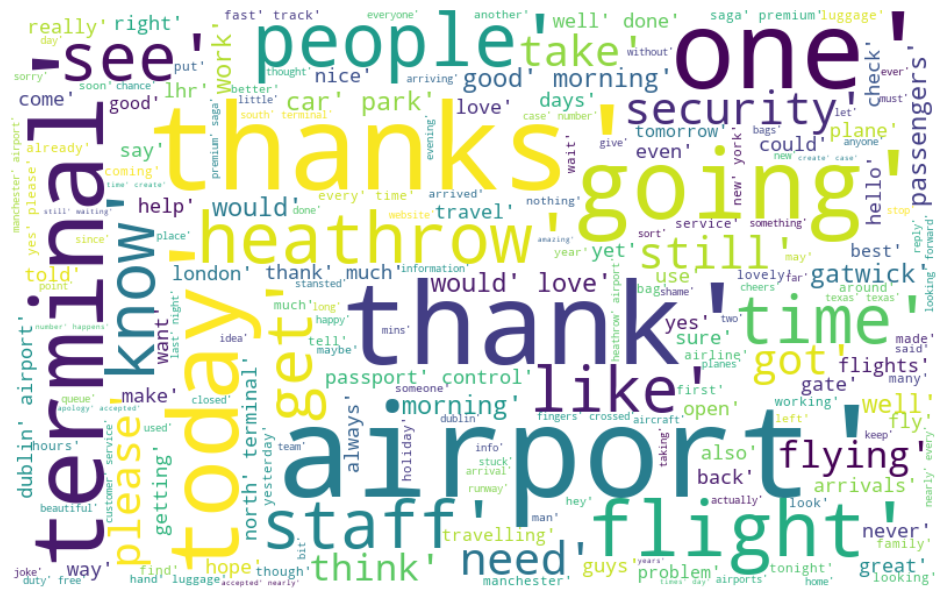

In [24]:
# all tokens illustrated in wordcloud

all_words = ' '.join([text for text in data_new['no_tokens']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

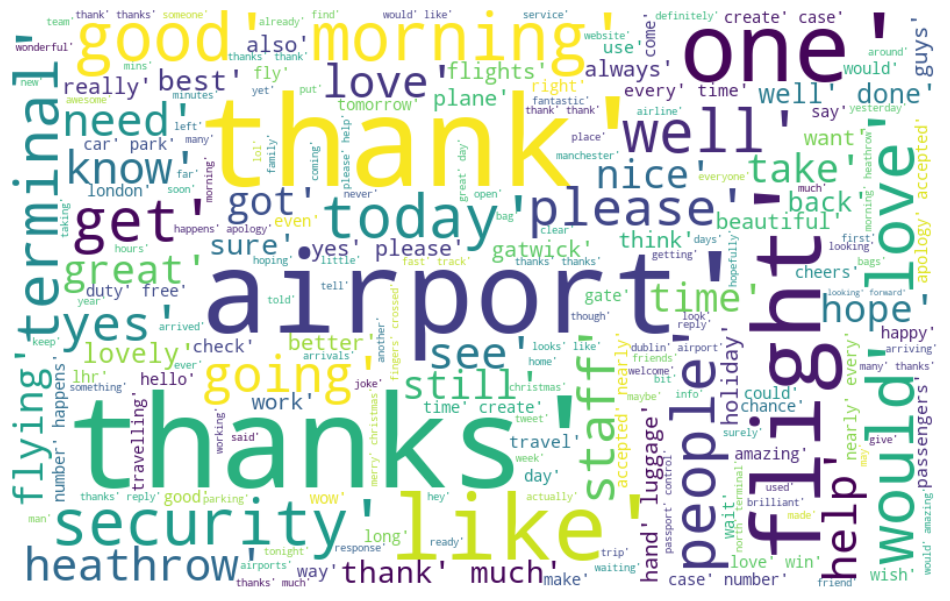

In [25]:
# all tokens illustrated in wordcloud but positive sentiment
# security, staff, arrived time, luggage, beautiful, passport control

normal_words =' '.join([text for text in data_new['no_tokens'][data_new['vader_sentiment_label'] == 1]])

wordcloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

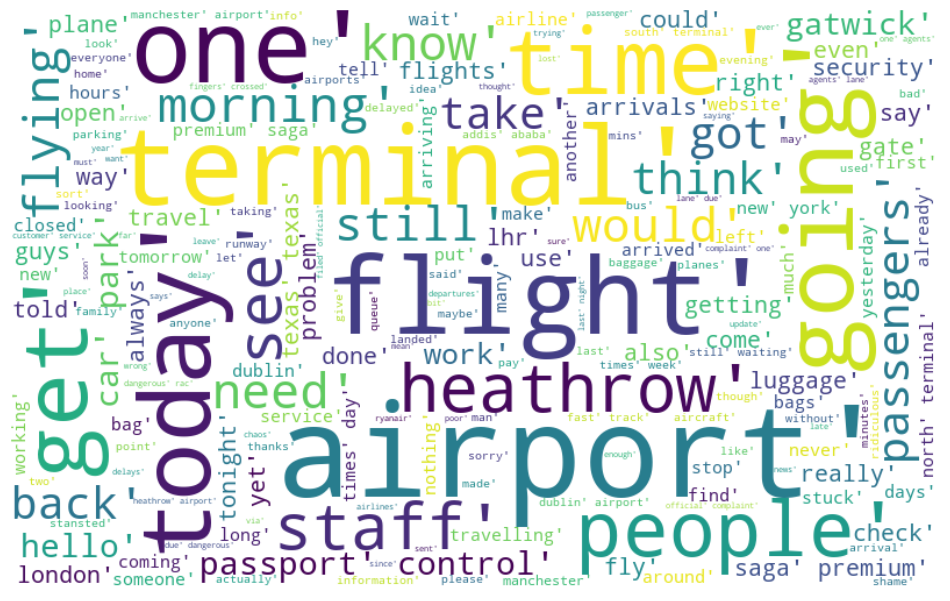

In [26]:
# all tokens illustrated in wordcloud but negative sentiment
# time, security, gate, bus, baggege, luggage, stuck, bag, car parking, passport control, staff

normal_words =' '.join([text for text in data_new['no_tokens'][data_new['vader_sentiment_label'] == 0]])

wordcloud = WordCloud(width=800, background_color='white', height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Example of Sentiment Intensity

Here you can make observations how the sentiment has developed during the selected period of time and make decisions what to do next in your analysis for instance to explore what is the reason behind the negative sentiment.

In [27]:
# Convert the data column to pandas datetime

data_new['Date'] = pd.to_datetime(data['Date']).dt.date 

<ipython-input-27-3e1560fc6b6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Date'] = pd.to_datetime(data['Date']).dt.date


In [28]:
# Setting up the data ready for Sentiment Intensity 

# Plotting a bar chart to visualize our sentiments.
# LHR    
# MAN   
# DUB    
# LGW    
# STN  

period = 100

mean_df = data_new.groupby(['Airport_IATA_Codes','Date']).mean().unstack().xs('vader_score', axis='columns').transpose()
mean_df = mean_df.iloc[-period:]

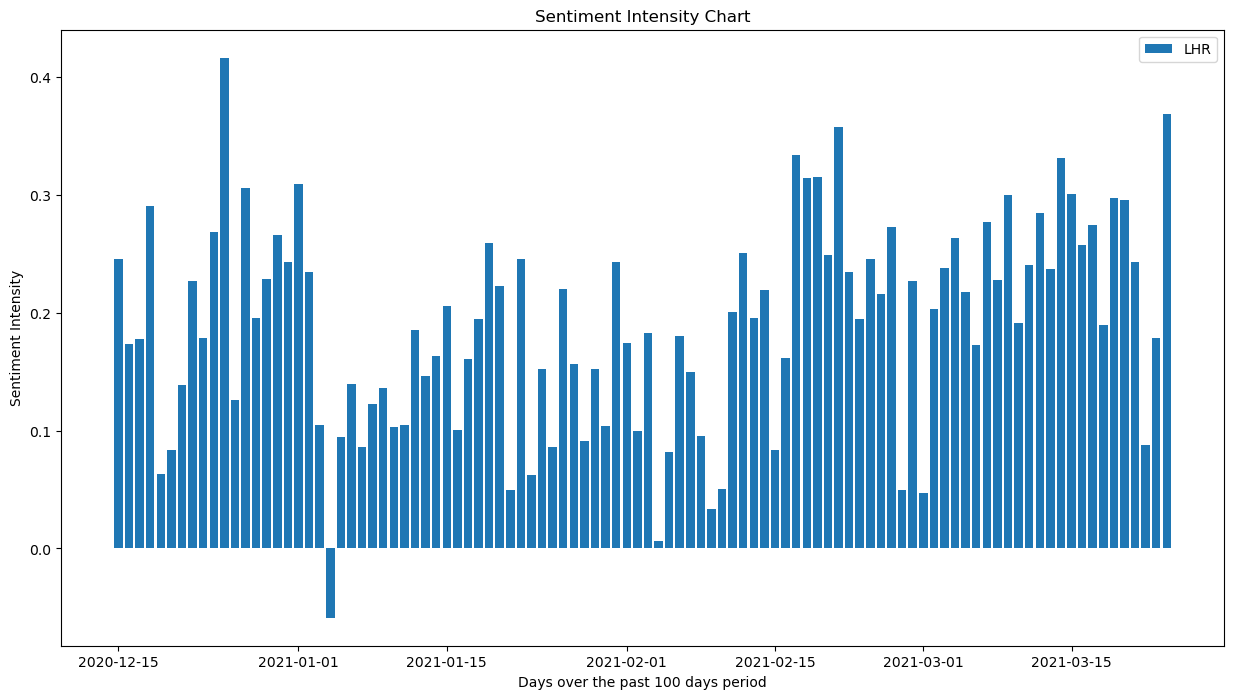

In [29]:
# Plot a bar chart to visualize our sentiments.
# LHR  

plt.figure(figsize=(15,8))

plt.bar(mean_df.index,mean_df.LHR , label='LHR') 

plt.title('Sentiment Intensity Chart')
plt.xlabel('Days over the past 100 days period')
plt.ylabel('Sentiment Intensity')
plt.legend()

plt.show()

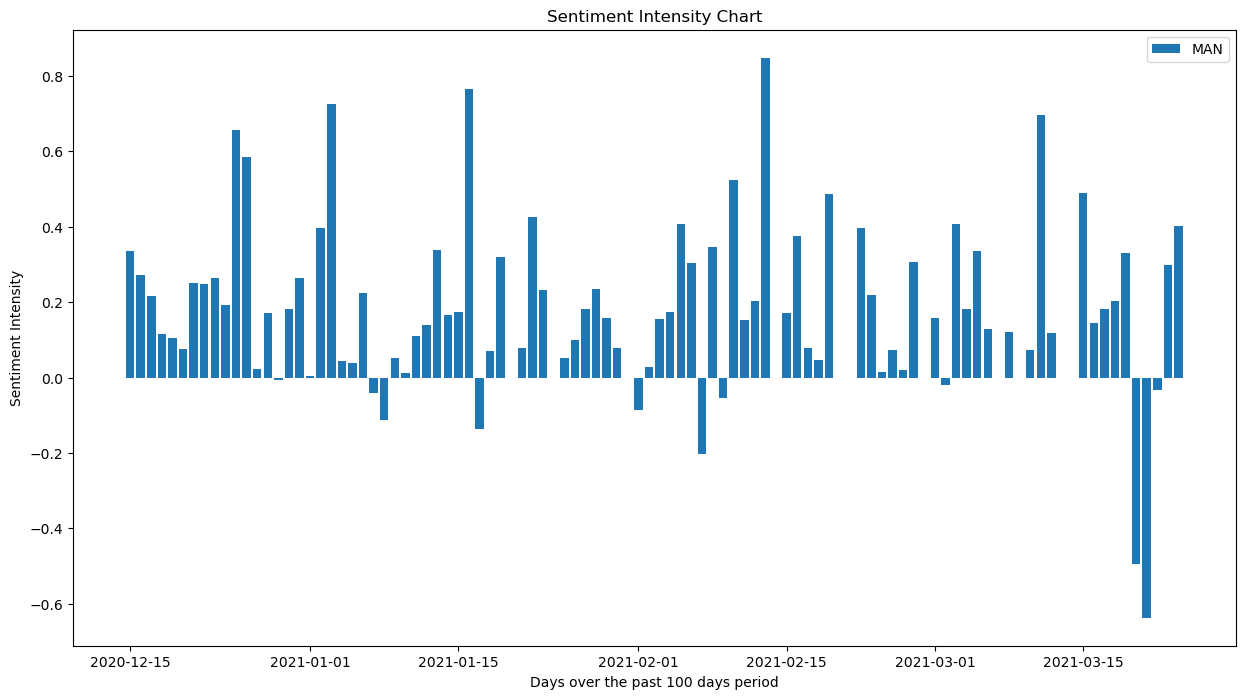

In [30]:
# Plot a bar chart to visualize our sentiments.
# MAN 

plt.figure(figsize=(15,8))

plt.bar(mean_df.index,mean_df.MAN, label='MAN')

plt.title('Sentiment Intensity Chart')
plt.xlabel('Days over the past 100 days period')
plt.ylabel('Sentiment Intensity')
plt.legend()

plt.show()

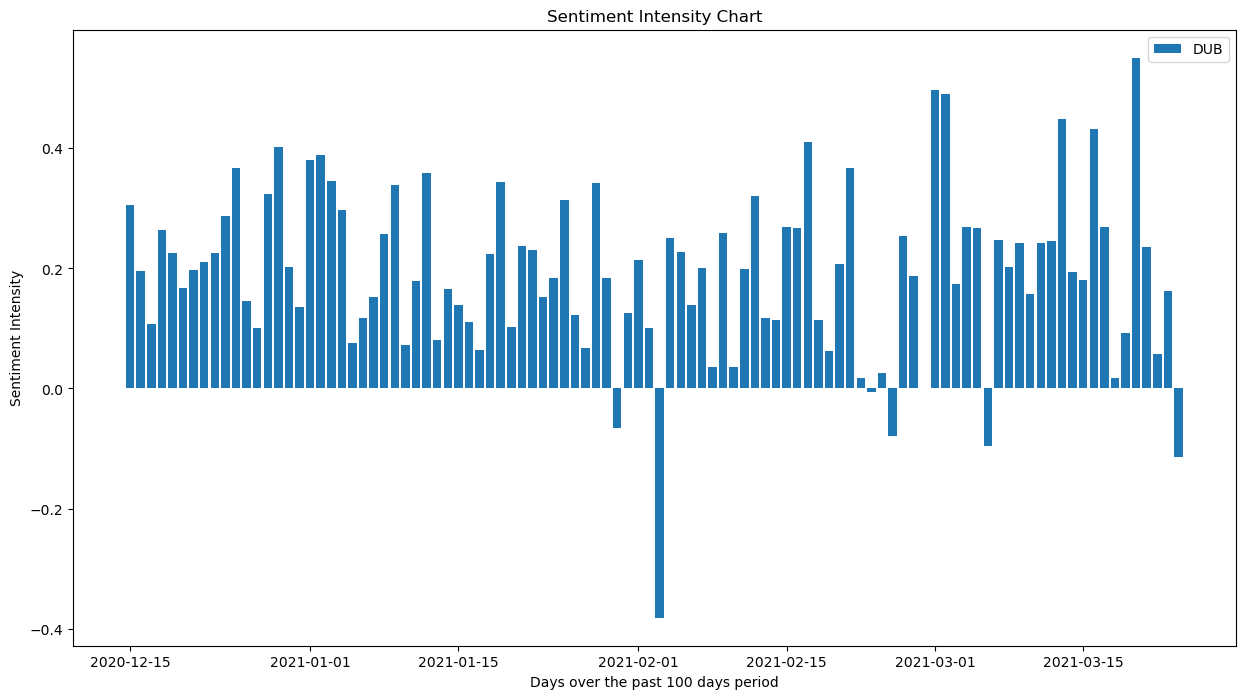

In [31]:
# Plot a bar chart to visualize our sentiments.

# DUB   

plt.figure(figsize=(15,8))

plt.bar(mean_df.index,mean_df.DUB, label='DUB')

plt.title('Sentiment Intensity Chart')
plt.xlabel('Days over the past 100 days period')
plt.ylabel('Sentiment Intensity')
plt.legend()

plt.show()

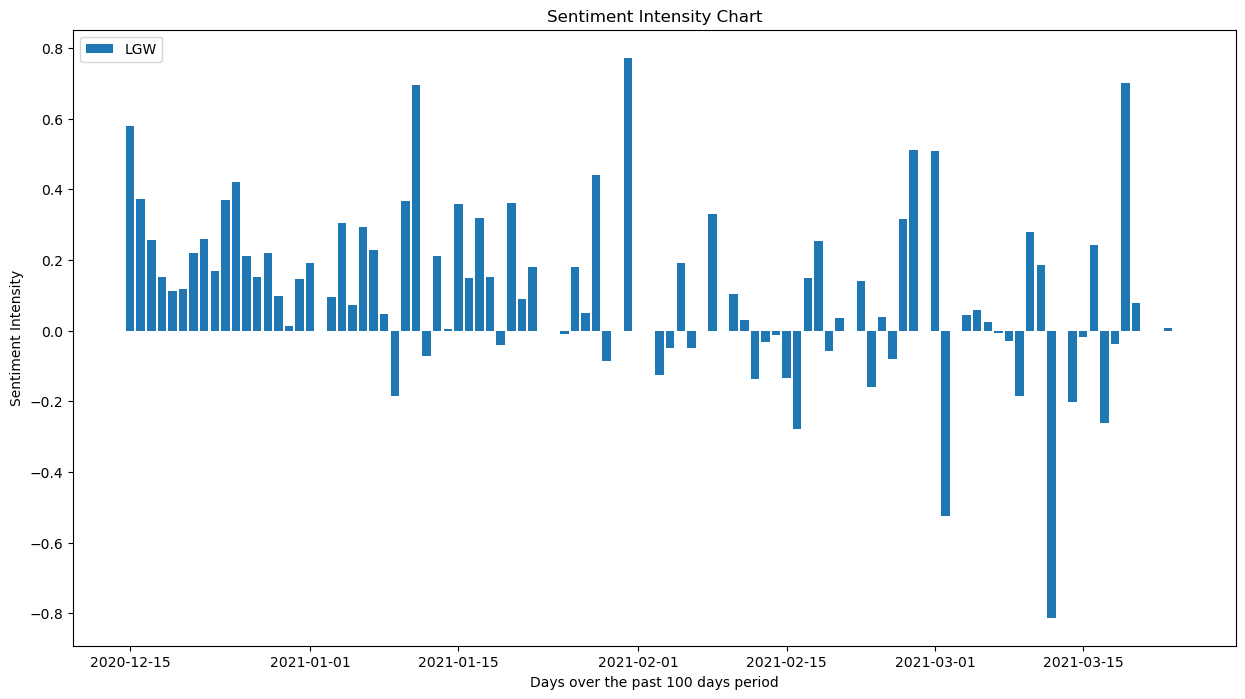

In [32]:
# Plot a bar chart to visualize our sentiments.

# LGW  


plt.figure(figsize=(15,8))

plt.bar(mean_df.index,mean_df.LGW, label='LGW')

plt.title('Sentiment Intensity Chart')
plt.xlabel('Days over the past 100 days period')
plt.ylabel('Sentiment Intensity')
plt.legend()

plt.show()

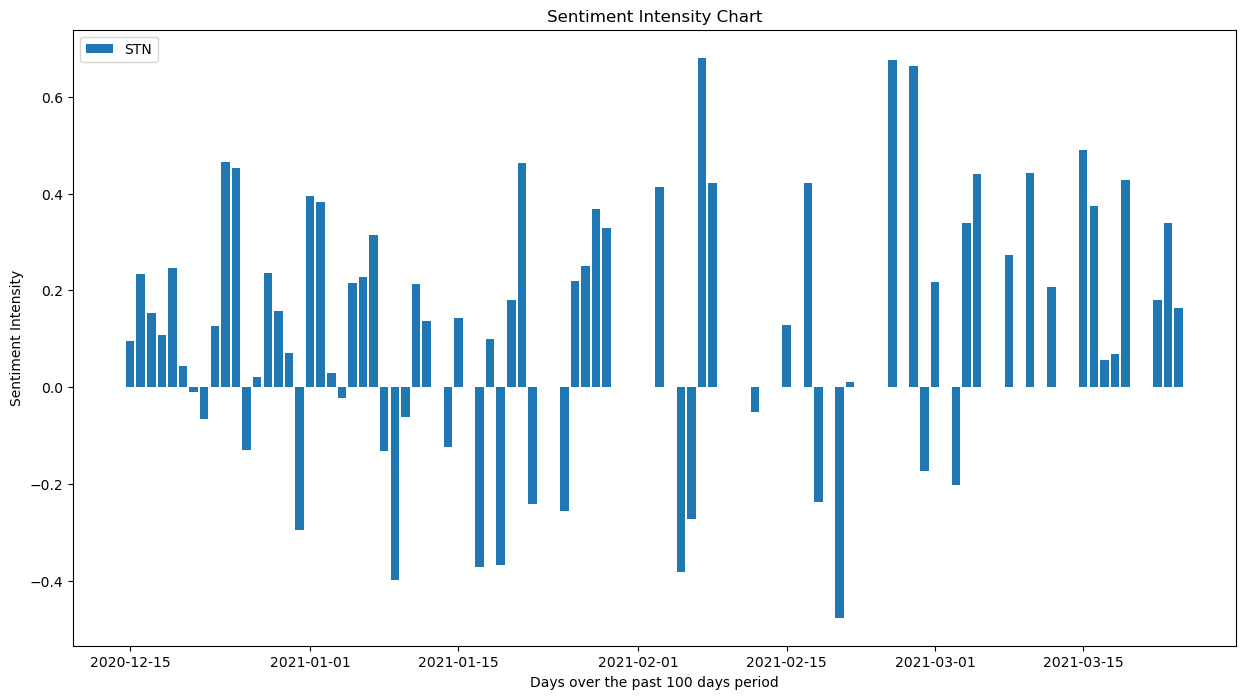

In [33]:
# Plot a bar chart to visualize our sentiments.

# STN   

plt.figure(figsize=(15,8))

plt.bar(mean_df.index,mean_df.STN, label='STN')

plt.title('Sentiment Intensity Chart')
plt.xlabel('Days over the past 100 days period')
plt.ylabel('Sentiment Intensity')
plt.legend()

plt.show()

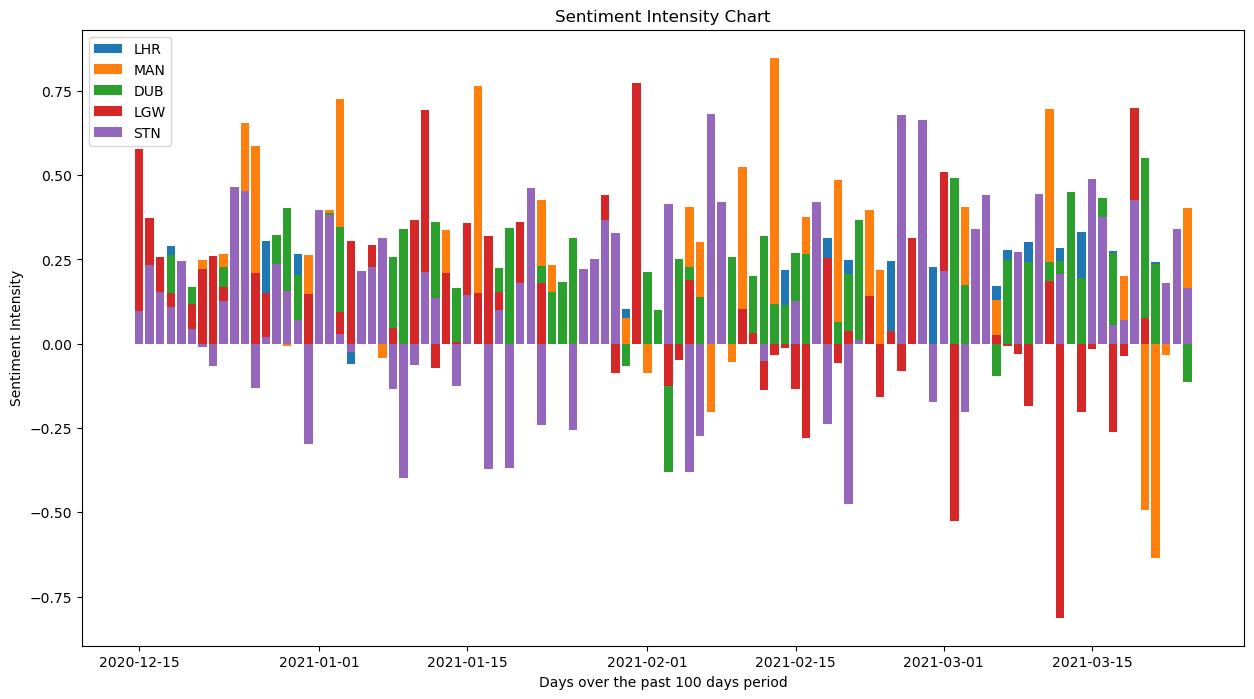

In [34]:
# Plot a bar chart to visualize our sentiments.

# LHR    
# MAN    
# DUB    
# LGW    
# STN   

plt.figure(figsize=(15,8))

plt.bar(mean_df.index,mean_df.LHR , label='LHR') 
plt.bar(mean_df.index,mean_df.MAN, label='MAN')
plt.bar(mean_df.index,mean_df.DUB, label='DUB')
plt.bar(mean_df.index,mean_df.LGW, label='LGW')
plt.bar(mean_df.index,mean_df.STN, label='STN')

plt.title('Sentiment Intensity Chart')
plt.xlabel('Days over the past 100 days period')
plt.ylabel('Sentiment Intensity')
plt.legend()

plt.show()

In [35]:
data.to_csv('newdata3.csv')